# Surface Cracks Detection

Street cracks are unsightly and present a safety hazard for motorists and pedestrians. Detecting these cracks early on enables authorities to conduct repairs before they worsen, it is now possible to carry out surface crack detection with greater precision and speed, using various techniques such as machine learning algorithms. In this way, roads can be made safer while maintenance costs are reduced by accurately detecting surface cracks.

## Import Libraries

In [7]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

## Read The File

#### Main Path

In [2]:
Surface_Data = Path('D:\Downloads\CracksDS')


#### JPG Path

In [49]:
Surface_JPG_Path = list(Surface_Data.glob(r"*/*.jpg"))

#### JPG Labels

In [50]:
Surface_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Surface_JPG_Path))

#### Convert the List to Series

In [5]:
filepaths = pd.Series(Surface_JPG_Path,name='Filepath').astype(str)
labels = pd.Series(Surface_Labels,name='Label')

#### Convert the Series to Dataframe

In [6]:
all_df = pd.concat([filepaths,labels],axis=1)

In [7]:
print(all_df.head(-1))


                                       Filepath     Label
0      D:\Downloads\CracksDS\Negative\00001.jpg  Negative
1      D:\Downloads\CracksDS\Negative\00002.jpg  Negative
2      D:\Downloads\CracksDS\Negative\00003.jpg  Negative
3      D:\Downloads\CracksDS\Negative\00004.jpg  Negative
4      D:\Downloads\CracksDS\Negative\00005.jpg  Negative
...                                         ...       ...
19994  D:\Downloads\CracksDS\Positive\09995.jpg  Positive
19995  D:\Downloads\CracksDS\Positive\09996.jpg  Positive
19996  D:\Downloads\CracksDS\Positive\09997.jpg  Positive
19997  D:\Downloads\CracksDS\Positive\09998.jpg  Positive
19998  D:\Downloads\CracksDS\Positive\09999.jpg  Positive

[19999 rows x 2 columns]


#### To Shuffle

In [8]:
all_df = all_df.sample(frac=1).reset_index(drop=True)

In [9]:
print(all_df.head(-1))

                                       Filepath     Label
0      D:\Downloads\CracksDS\Negative\05001.jpg  Negative
1      D:\Downloads\CracksDS\Positive\06948.jpg  Positive
2      D:\Downloads\CracksDS\Positive\00742.jpg  Positive
3      D:\Downloads\CracksDS\Negative\03760.jpg  Negative
4      D:\Downloads\CracksDS\Positive\07137.jpg  Positive
...                                         ...       ...
19994  D:\Downloads\CracksDS\Negative\07389.jpg  Negative
19995  D:\Downloads\CracksDS\Positive\02679.jpg  Positive
19996  D:\Downloads\CracksDS\Negative\03630.jpg  Negative
19997  D:\Downloads\CracksDS\Positive\01295.jpg  Positive
19998  D:\Downloads\CracksDS\Negative\07913.jpg  Negative

[19999 rows x 2 columns]


## Visualization

In [10]:
plt.style.use("dark_background")

#### the Labels

In [11]:
positive_df = all_df[all_df['Label'] == "Positive"]
negative_df = all_df[all_df['Label'] == "Negative"]

positive_df = positive_df.reset_index()
negative_df= negative_df.reset_index()

#### Simple Vision Function

In [12]:
def simple_vision(path):
    figure = plt.figure(figsize=(4,4))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    plt.xlabel(Reading_Img.shape)
    plt.ylabel(Reading_Img.size)
    plt.imshow(Reading_Img)

## Simple Vision 

#### With Crack

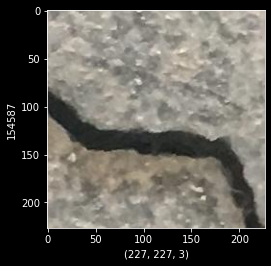

In [13]:
simple_vision(all_df['Filepath'][4])

#### set of cracks

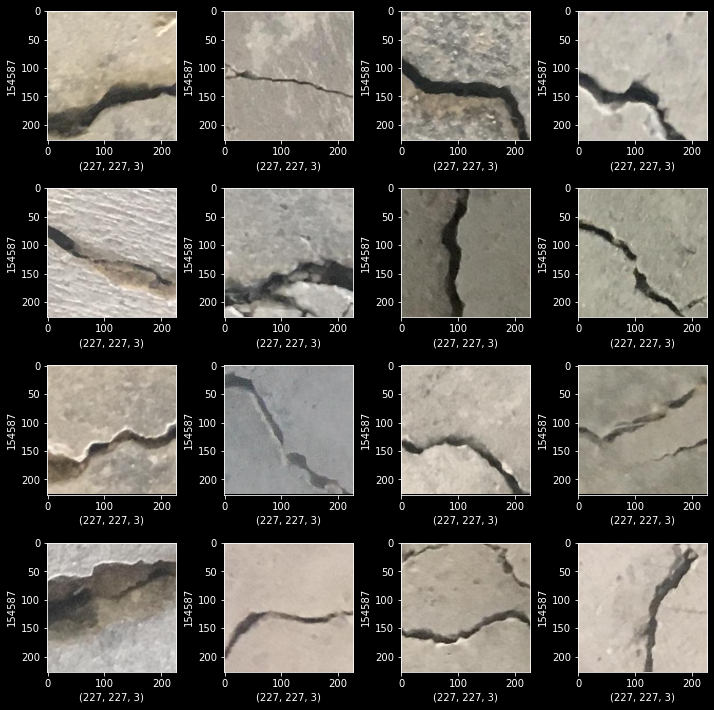

In [15]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(positive_df['Filepath'][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    operations.set_xlabel(Reading_Img.shape)
    operations.set_ylabel(Reading_Img.size)
    operations.imshow(Reading_Img)
    
plt.tight_layout()
plt.show()

#### Set Without Cracks

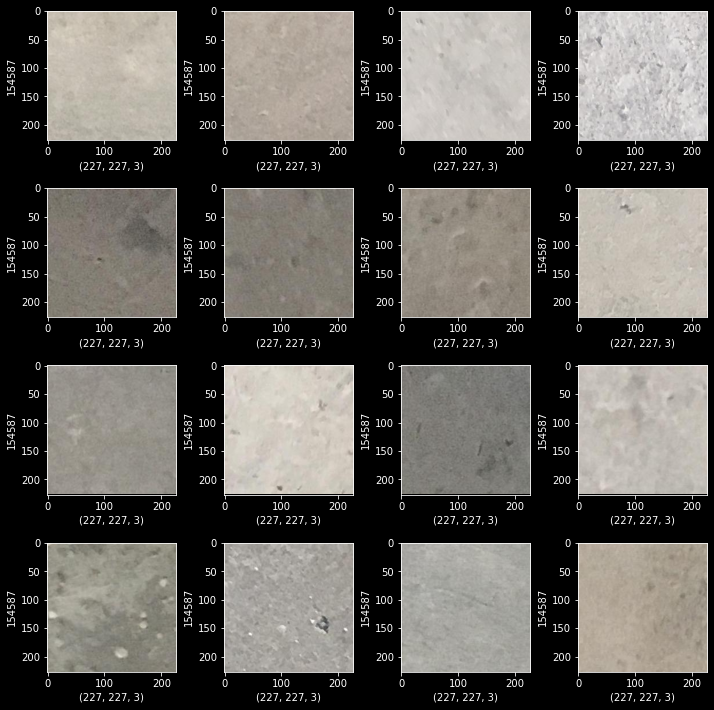

In [16]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(negative_df['Filepath'][indexing])
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    operations.set_xlabel(Reading_Img.shape)
    operations.set_ylabel(Reading_Img.size)
    operations.imshow(Reading_Img)
    
plt.tight_layout()
plt.show()

# Splitting Train and Test

In [17]:
train_df, test_df = train_test_split(
    all_df,
    train_size=0.7,
    shuffle=True,
    random_state=1
)

In [18]:
print(train_df.shape)
print(test_df.shape)

(14000, 2)
(6000, 2)


## Image Generator

### The Structure of Image Generator

In [19]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

# Applying the Generator

In [20]:
train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_data = train_gen.flow_from_dataframe(
    test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 11200 validated image filenames belonging to 2 classes.
Found 2800 validated image filenames belonging to 2 classes.
Found 6000 validated image filenames belonging to 2 classes.


### To Check

In [21]:
print("TRAIN: ")
print(train_data.class_indices)
print(train_data.classes[0:5])
print(train_data.image_shape)
print("---"*20)
print("VALIDATION: ")
print(val_data .class_indices)
print(val_data .classes[0:5])
print(val_data .image_shape)
print("---"*20)
print("TEST: ")
print(test_data.class_indices)
print(test_data.classes[0:5])
print(test_data.image_shape)

TRAIN: 
{'Negative': 0, 'Positive': 1}
[0, 0, 1, 1, 0]
(120, 120, 3)
------------------------------------------------------------
VALIDATION: 
{'Negative': 0, 'Positive': 1}
[1, 1, 0, 1, 0]
(120, 120, 3)
------------------------------------------------------------
TEST: 
{'Negative': 0, 'Positive': 1}
[0, 0, 1, 0, 0]
(120, 120, 3)


## Creating the Model

In [22]:
compile_optimizer = "adam"
compile_loss = "binary_crossentropy"
input_dim = (train_data.image_shape[0],train_data.image_shape[1],train_data.image_shape[2])
class_dim = 1

In [23]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [24]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=input_dim))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(class_dim,activation="sigmoid"))

In [25]:
model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=["accuracy"])

In [26]:
CNN_Model = model.fit(train_data,
                      validation_data=val_data,
                      callbacks=[Early_Stopper,Checkpoint_Model],
                      epochs=10)

Epoch 1/10
350/350 [==============================] - 272s 773ms/step - loss: 0.1332 - accuracy: 0.9680 - val_loss: 0.5495 - val_accuracy: 0.7289
Epoch 2/10
350/350 [==============================] - 263s 750ms/step - loss: 0.0358 - accuracy: 0.9899 - val_loss: 0.0525 - val_accuracy: 0.9846
Epoch 3/10
350/350 [==============================] - 258s 736ms/step - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.1210 - val_accuracy: 0.9793
Epoch 4/10
350/350 [==============================] - 261s 746ms/step - loss: 0.0288 - accuracy: 0.9923 - val_loss: 0.0824 - val_accuracy: 0.9846
Epoch 5/10
350/350 [==============================] - 267s 763ms/step - loss: 0.0675 - accuracy: 0.9873 - val_loss: 0.0826 - val_accuracy: 0.9936
Epoch 6/10
350/350 [==============================] - 263s 753ms/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.0240 - val_accuracy: 0.9950
Epoch 7/10
350/350 [==============================] - 258s 737ms/step - loss: 0.0154 - accuracy: 0.9960 - val_loss: 0.0259 -

###  Model Visualization

<AxesSubplot:>

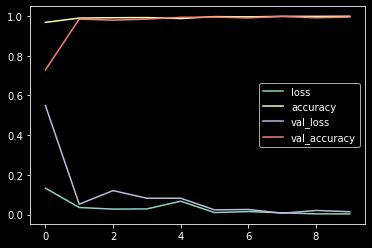

In [27]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


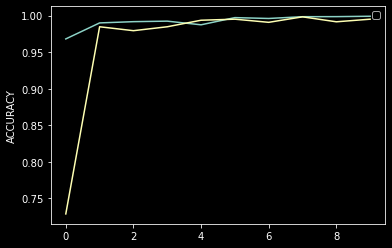

In [28]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


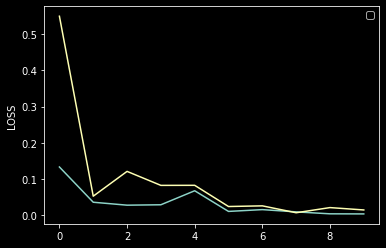

In [29]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [30]:
def evaluate_model(model, test_data):
    
    results = model.evaluate(test_data, verbose=0)
    loss = results[0]
    acc = results[1]
    
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))
    
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
    cm = confusion_matrix(test_data.labels, y_pred)
    clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

    Test Loss: 0.02201
Test Accuracy: 99.37%
188/188 [==============================] - 51s 271ms/step


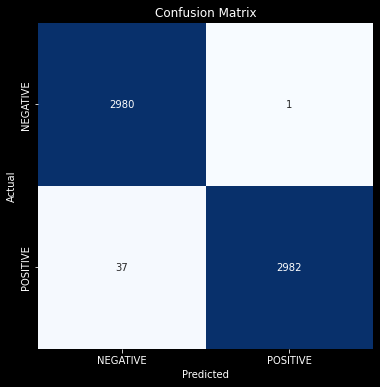

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.99      1.00      0.99      2981
    POSITIVE       1.00      0.99      0.99      3019

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [31]:
evaluate_model(model, test_data)

In [32]:
Model_Test_Prediction = model.predict(test_data)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)
print(Model_Test_Prediction)

188/188 [==============================] - 56s 297ms/step
[0 0 0 ... 0 0 0]


In [47]:


Model_Test_Prediction_Classes = (model.predict(test_data) > 0.5).astype("int32")
print(Model_Test_Prediction_Classes)




188/188 [==============================] - 52s 274ms/step
[[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [0]]


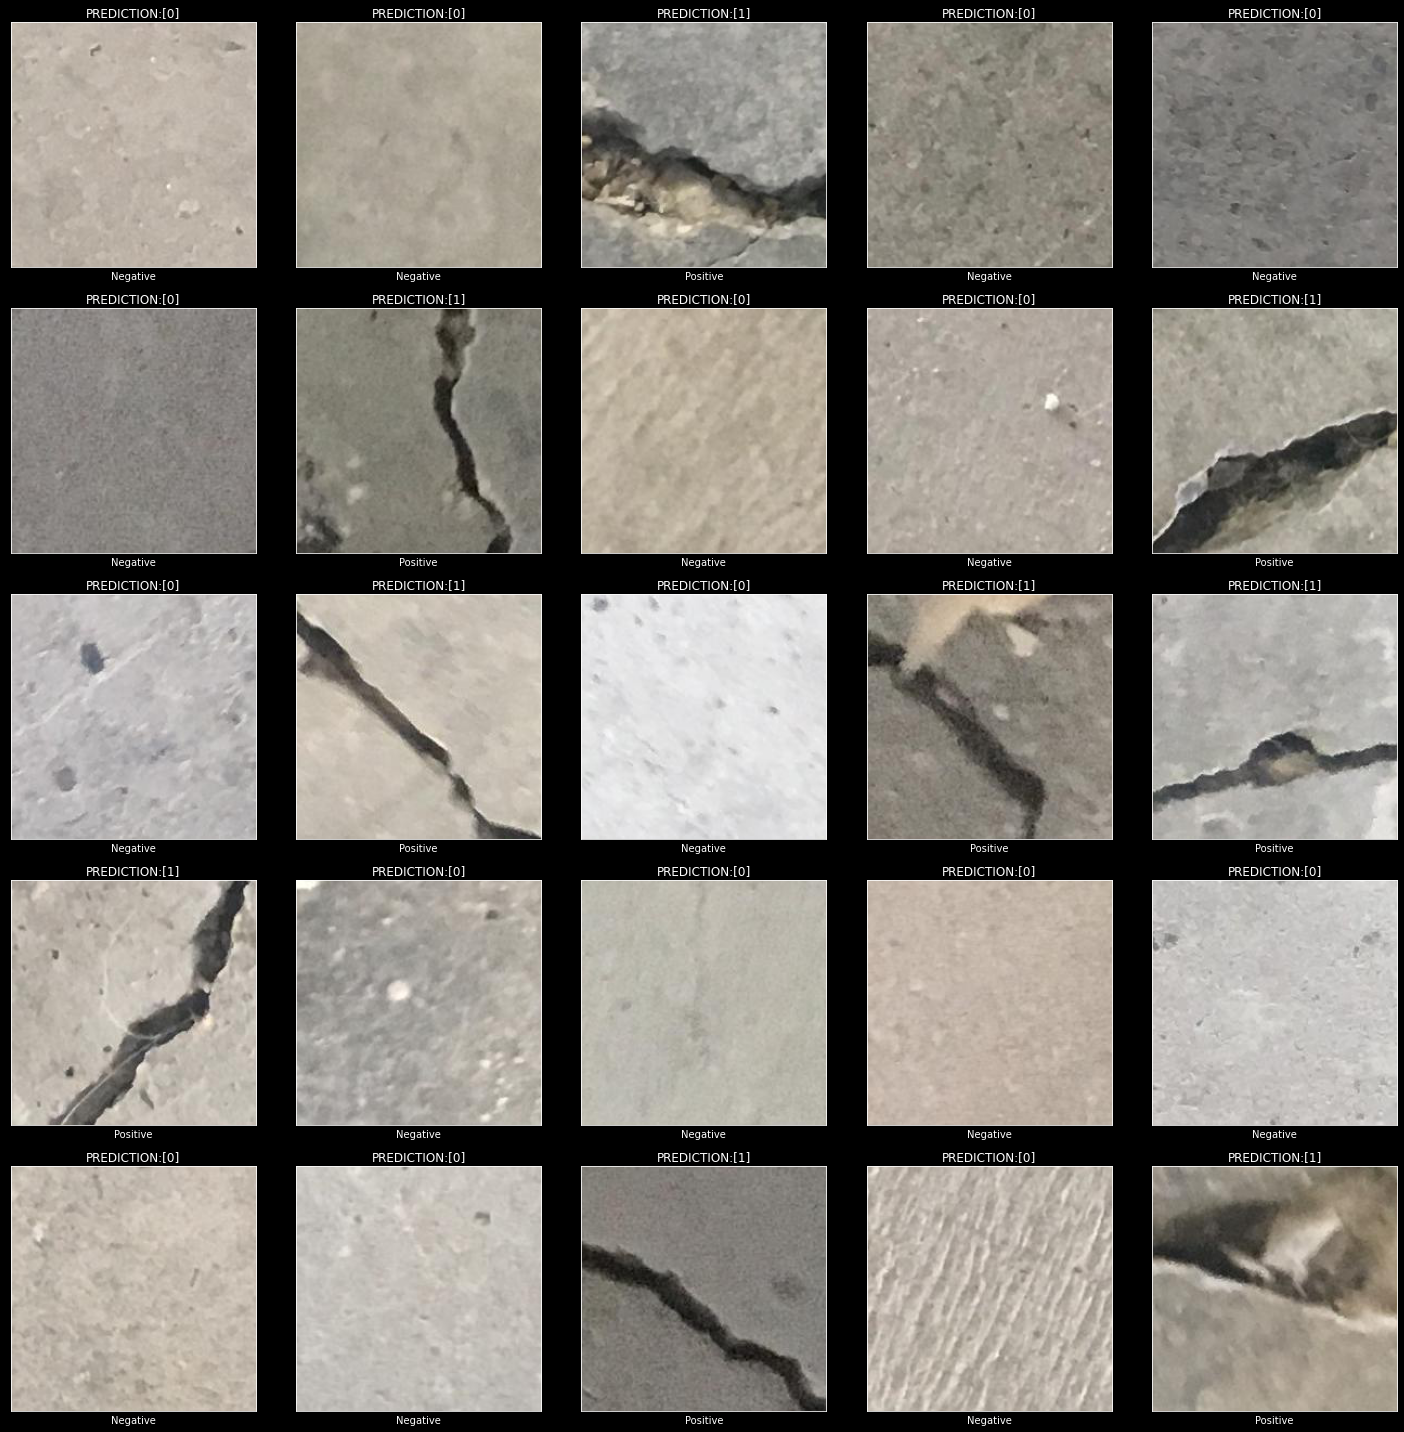

In [48]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df["Filepath"].iloc[i]))
    ax.set_title(f"PREDICTION:{Model_Test_Prediction_Classes[i]}")
    ax.set_xlabel(test_df["Label"].iloc[i])
plt.tight_layout()
plt.show()



# Image Processing

In [2]:
import cv2 
import skimage 
import numpy as np
import glob
images = [cv2.imread(file) for file in glob.glob('D:\Downloads\CracksDS\Positive\*.jpg')]
for num, file in enumerate(images):
    #size= cv2.resize(file, (12,12))
    gray=cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)
    blur_image=cv2.GaussianBlur (gray, (9,9), 0)
    Threshold_blur=cv2.adaptiveThreshold(
            blur_image,
            maxValue = 255.0,
            adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            thresholdType = cv2.THRESH_BINARY_INV,
            blockSize = 19,
            C = 9 )
    cv2.imwrite('Positive\img{}.jpg'.format(num), Threshold_blur) 
print('Successfully saved')


Successfully saved


In [6]:
import cv2 
import skimage 
import numpy as np
import glob
images2 = [cv2.imread(file) for file in glob.glob(r'D:\Downloads\CracksDS\Negative\*.jpg')]
for num, file in enumerate(images2):
    #size2= cv2.resize(file, (12,12))
    gray2=cv2.cvtColor(file, cv2.COLOR_BGR2GRAY)
    blur_image=cv2.GaussianBlur (gray2, (9,9), 0)
    Threshold_blur2=cv2.adaptiveThreshold(
            blur_image,
            maxValue = 255.0,
            adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            thresholdType = cv2.THRESH_BINARY_INV,
            blockSize = 19,
            C = 9 )
    cv2.imwrite('Negative\img{}.jpg'.format(num), Threshold_blur2) 
print('Successfully saved')

Successfully saved


In [45]:
plt.style.use("dark_background")

In [46]:
positive_dir = Path(r'C:\Users\Manar Mohammed\abc ip project\Positive')
negative_dir = Path(r'C:\Users\Manar Mohammed\abc ip project\Negative')

In [47]:
def generate_df(image_dir, label):
    filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=filepaths.index)
    df = pd.concat([filepaths, labels], axis=1)
    return df

In [48]:
positive_df = generate_df(positive_dir, label="POSITIVE")
negative_df = generate_df(negative_dir, label="NEGATIVE")

all_df = pd.concat([positive_df, negative_df], axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)
all_df

,Filepath,Label
0,C:\Users\Manar Mohammed\abc ip project\Negativ...,NEGATIVE
1,C:\Users\Manar Mohammed\abc ip project\Negativ...,NEGATIVE
2,C:\Users\Manar Mohammed\abc ip project\Positiv...,POSITIVE
3,C:\Users\Manar Mohammed\abc ip project\Negativ...,NEGATIVE
4,C:\Users\Manar Mohammed\abc ip project\Positiv...,POSITIVE
...,...,...
19995,C:\Users\Manar Mohammed\abc ip project\Negativ...,NEGATIVE
19996,C:\Users\Manar Mohammed\abc ip project\Negativ...,NEGATIVE
19997,C:\Users\Manar Mohammed\abc ip project\Positiv...,POSITIVE
19998,C:\Users\Manar Mohammed\abc ip project\Negativ...,NEGATIVE


In [49]:
def simple_vision(path):
    figure = plt.figure(figsize=(4,4))
    
    Reading_Img = cv2.imread(path)
 
    
    plt.xlabel(Reading_Img.shape)
    plt.ylabel(Reading_Img.size)
    plt.imshow(Reading_Img)

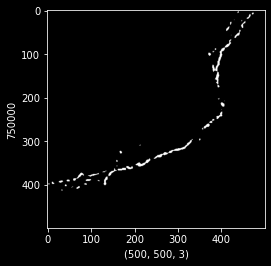

In [50]:
simple_vision(all_df['Filepath'][4])

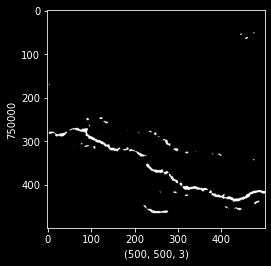

In [51]:
simple_vision(all_df['Filepath'][2])

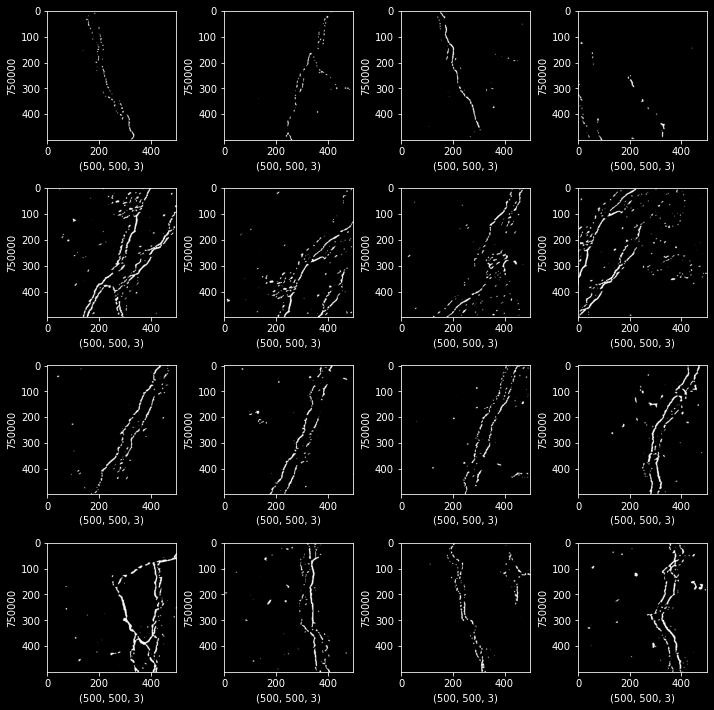

In [52]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(positive_df['Filepath'][indexing])
  
    
    operations.set_xlabel(Reading_Img.shape)
    operations.set_ylabel(Reading_Img.size)
    operations.imshow(Reading_Img)
    
plt.tight_layout()
plt.show()

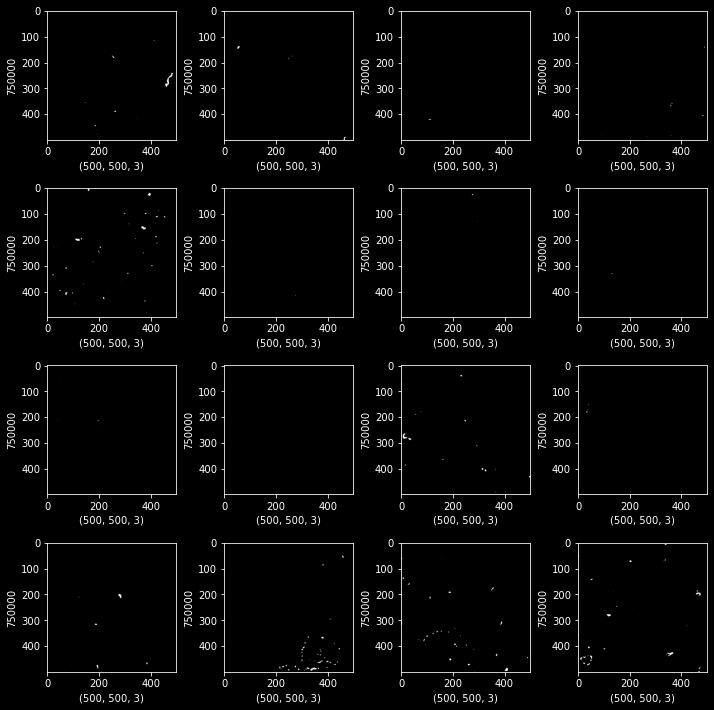

In [53]:
figure,axis = plt.subplots(4,4,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_Img = cv2.imread(negative_df['Filepath'][indexing])

    
    operations.set_xlabel(Reading_Img.shape)
    operations.set_ylabel(Reading_Img.size)
    operations.imshow(Reading_Img)
    
plt.tight_layout()
plt.show()

In [54]:
train_df, test_df = train_test_split(
    all_df,
    train_size=0.7,
    shuffle=True,
    random_state=1
)

In [55]:
print(train_df.shape)
print(test_df.shape)

(14000, 2)
(6000, 2)


In [56]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [57]:
train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_data = train_gen.flow_from_dataframe(
    test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(120, 120),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 11200 validated image filenames belonging to 2 classes.
Found 2800 validated image filenames belonging to 2 classes.
Found 6000 validated image filenames belonging to 2 classes.


In [58]:
print("TRAIN: ")
print(train_data.class_indices)
print(train_data.classes[0:5])
print(train_data.image_shape)
print("---"*20)
print("VALIDATION: ")
print(val_data .class_indices)
print(val_data .classes[0:5])
print(val_data .image_shape)
print("---"*20)
print("TEST: ")
print(test_data.class_indices)
print(test_data.classes[0:5])
print(test_data.image_shape)

TRAIN: 
{'NEGATIVE': 0, 'POSITIVE': 1}
[1, 0, 0, 1, 0]
(120, 120, 1)
------------------------------------------------------------
VALIDATION: 
{'NEGATIVE': 0, 'POSITIVE': 1}
[1, 0, 1, 1, 1]
(120, 120, 1)
------------------------------------------------------------
TEST: 
{'NEGATIVE': 0, 'POSITIVE': 1}
[0, 0, 1, 1, 1]
(120, 120, 1)


In [59]:
compile_optimizer = "adam"
compile_loss = "binary_crossentropy"
input_dim = (train_data.image_shape[0],train_data.image_shape[1],train_data.image_shape[2])
class_dim = 1

In [60]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [61]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=input_dim))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(class_dim,activation="sigmoid"))

In [62]:
model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=["accuracy"])

In [63]:
CNN_Model = model.fit(train_data,
                      validation_data=val_data,
                      callbacks=[Early_Stopper,Checkpoint_Model],
                      epochs=10)

Epoch 1/10
350/350 [==============================] - 320s 907ms/step - loss: 0.2073 - accuracy: 0.9329 - val_loss: 0.3411 - val_accuracy: 0.8989
Epoch 2/10
350/350 [==============================] - 240s 686ms/step - loss: 0.0843 - accuracy: 0.9723 - val_loss: 0.0789 - val_accuracy: 0.9807
Epoch 3/10
350/350 [==============================] - 206s 588ms/step - loss: 0.0668 - accuracy: 0.9791 - val_loss: 0.0888 - val_accuracy: 0.9714
Epoch 4/10
350/350 [==============================] - 207s 591ms/step - loss: 0.0601 - accuracy: 0.9801 - val_loss: 0.0913 - val_accuracy: 0.9711
Epoch 5/10
350/350 [==============================] - 279s 796ms/step - loss: 0.0430 - accuracy: 0.9846 - val_loss: 0.0646 - val_accuracy: 0.9829
Epoch 6/10
350/350 [==============================] - 220s 628ms/step - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.0581 - val_accuracy: 0.9821
Epoch 7/10
350/350 [==============================] - 3553s 10s/step - loss: 0.0397 - accuracy: 0.9871 - val_loss: 0.0767 - 

<AxesSubplot:>

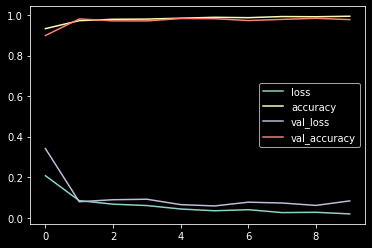

In [64]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


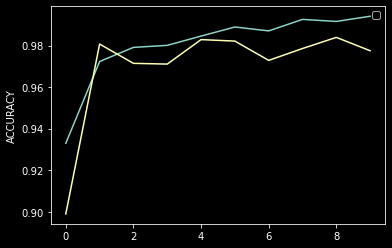

In [65]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


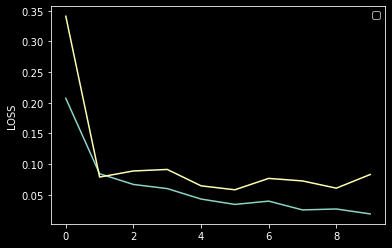

In [66]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [67]:
def evaluate_model(model, test_data):
    
    results = model.evaluate(test_data, verbose=0)
    loss = results[0]
    acc = results[1]
    
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))
    
    y_pred = np.squeeze((model.predict(test_data) >= 0.5).astype(np.int))
    cm = confusion_matrix(test_data.labels, y_pred)
    clr = classification_report(test_data.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
    plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

    Test Loss: 0.08268
Test Accuracy: 97.87%
188/188 [==============================] - 38s 198ms/step


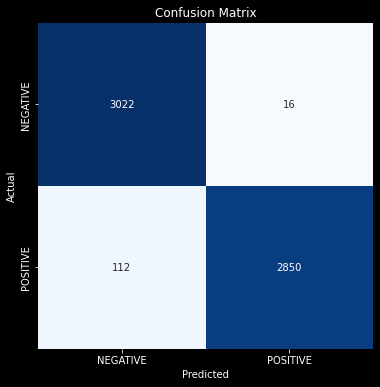

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.96      0.99      0.98      3038
    POSITIVE       0.99      0.96      0.98      2962

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



In [68]:
evaluate_model(model, test_data)

In [69]:
Model_Test_Prediction = model.predict(test_data)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis=-1)
print(Model_Test_Prediction)

188/188 [==============================] - 37s 198ms/step
[0 0 0 ... 0 0 0]


In [70]:

Model_Test_Prediction_Classes = (model.predict(test_data) > 0.5).astype("int32")
print(Model_Test_Prediction_Classes)

188/188 [==============================] - 39s 205ms/step
[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


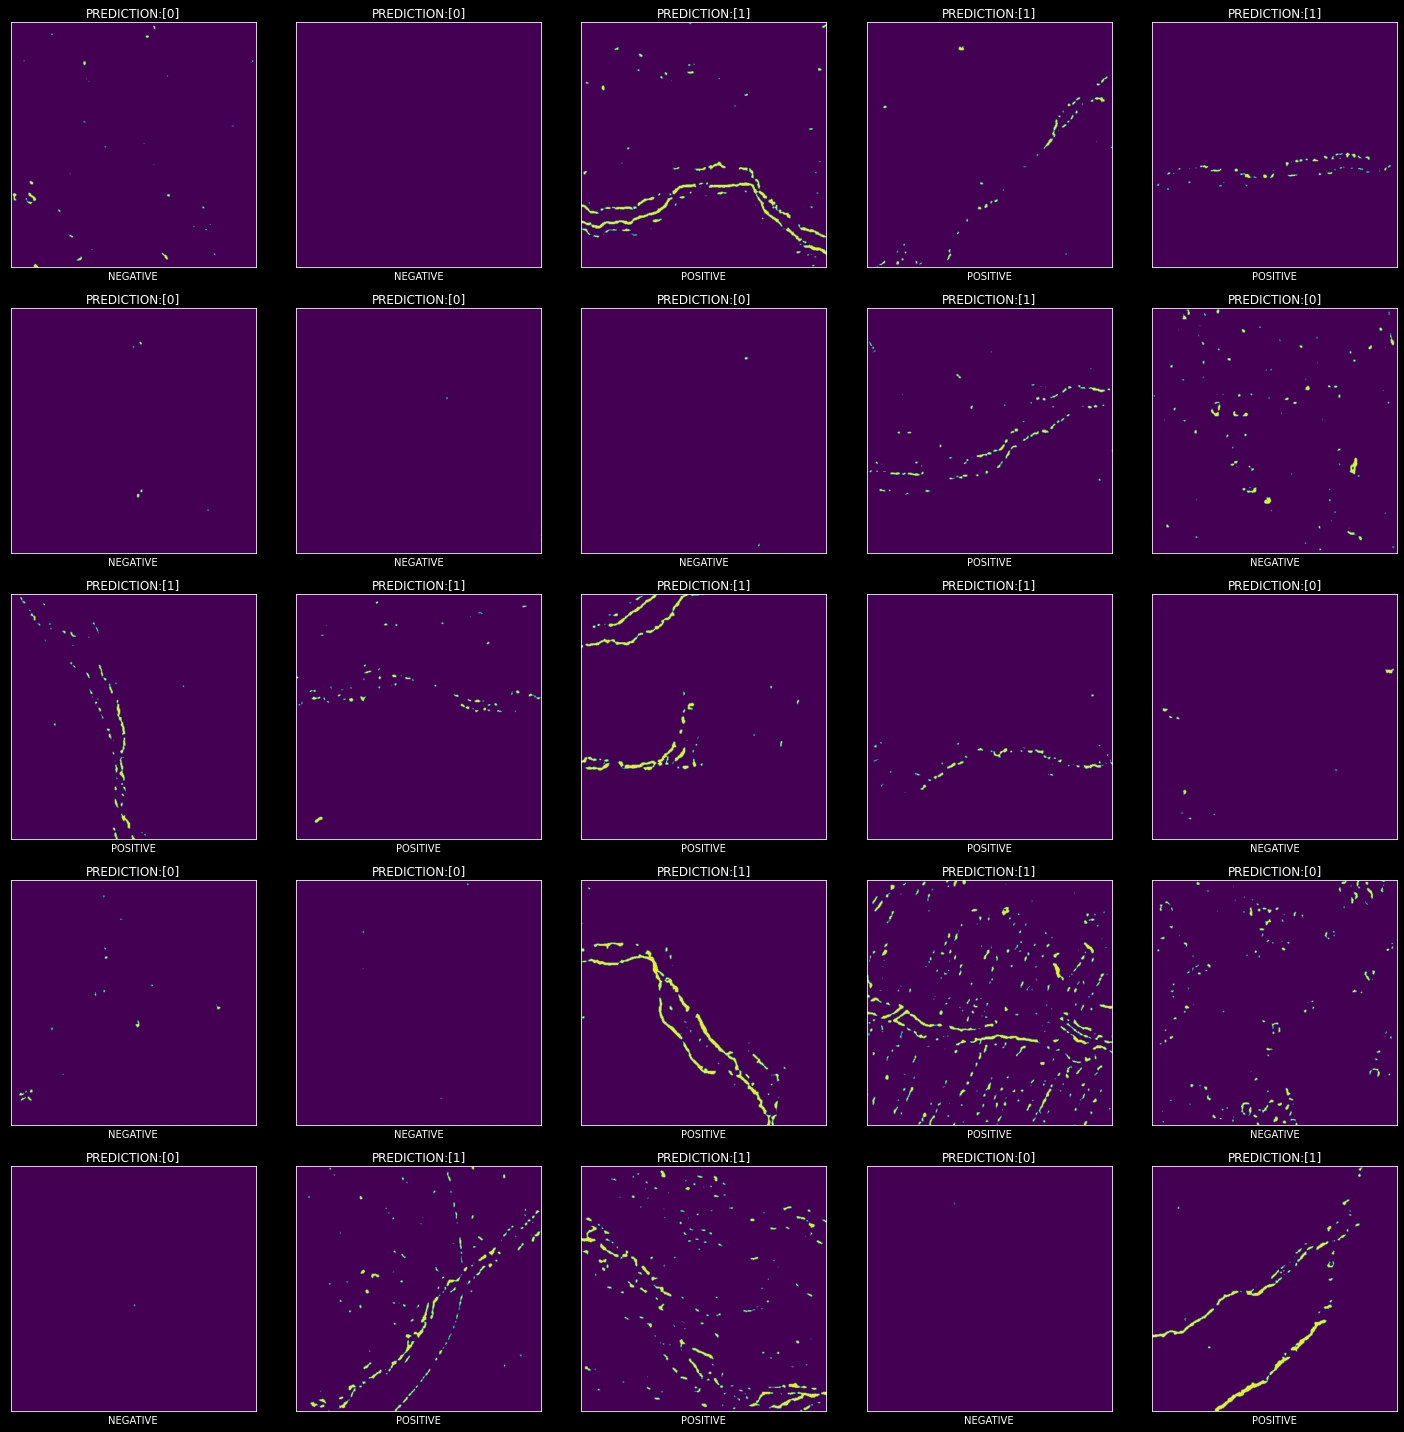

In [71]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df["Filepath"].iloc[i]))
    ax.set_title(f"PREDICTION:{Model_Test_Prediction_Classes[i]}")
    ax.set_xlabel(test_df["Label"].iloc[i])
plt.tight_layout()
plt.show()